In [17]:
Selección de dataset Sleep_health.csv, dicho dataset contiene una muestra pequeña de personas de diferentes ocupaciones y habitos de sueño. 
Con el objetivo de verificar la relevancia que se tiene en cuanto a las horas de sueño y calidad de vida.
    
### Dataset Sleep_health Descripción ###
# Person ID: Id de identificación de correlativo.
# Gender: Genero (Male/Female).
# Age: Edad de la persona.
# Occupation: Ocupación.
# Sleep Duration (hours): Numero de horas de sueño por día.
# Quality of Sleep (scale: 1-10): Escala de calidad de sueño en la escala del 1 al 10.
# Physical Activity Level (minutes/day): Minutos de actividad física de la persona por día.
# Stress Level (scale: 1-10): Nivel de estrés que experimenta la persona en la escala del 1 al 10.
# BMI Category: Categoría de sobrepeso de la persona (Bajo, Normal, Alto).
# Blood Pressure (systolic/diastolic): Presión arterial.
# Heart Rate (bpm): Latidos por minuto.
# Daily Steps: Pasos diarios.
# Sleep Disorder: Desorden de sueño (None, Insomnia, Sleep Apnea).

In [76]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings(action = "ignore")

Explorando Dataset Sleep_health.csv

In [160]:
#Lectura de dataset
data = pd.read_csv("Data/Sleep_health.csv", sep = ',')

#Información de columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [159]:
#Muestra primeros 15 registros
data.head(15)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [59]:
#Tamaño de dataset
data.shape

(374, 13)

In [60]:
#Columnas
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [61]:
# Revisión de duplicados
data.duplicated().sum()

np.int64(0)

In [6]:
# Revisión de valores nulos
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [158]:
# Analisis Estadísticos General
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [9]:
# Analisis Estadísticos para campos numericos
data.describe(include = "number").T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [11]:
# Analisis Estadísticos para campos no numericos
data.describe(include = ["object"])

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


In [63]:
#Cantidad de registros por gnero
data['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [16]:
#Porcentaje de genero dentro del ds
# data["Gender"].value_counts(normalize = True)

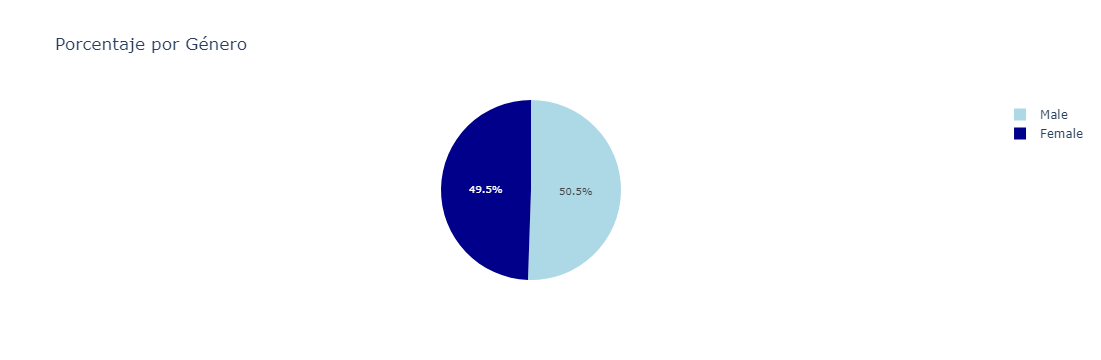

In [137]:
#G1:Porcentaje de genero
fig = px.pie(data, names = "Gender", title = "Porcentaje por Género",color='Gender', color_discrete_map={'Male':'lightblue',
                                 'Female':'darkblue'})
fig.update_traces(hoverinfo='label+percent', textfont_size=10)
fig.show()

In [6]:
# Edad menor
data['Age'].min()

np.int64(27)

In [18]:
#  Edad mayor
data['Age'].max()

np.int64(59)

In [65]:
#Promedio de horas de sueño
data['Sleep Duration'].mean()

np.float64(7.132085561497325)

In [72]:
#Promedio de horas de sueño entre hombres y mujeres
data.groupby(['Gender'])['Sleep Duration'].mean().reset_index(name='Promedio')

,Gender,Promedio
0,Female,7.229730
1,Male,7.036508


Visualización de graficos

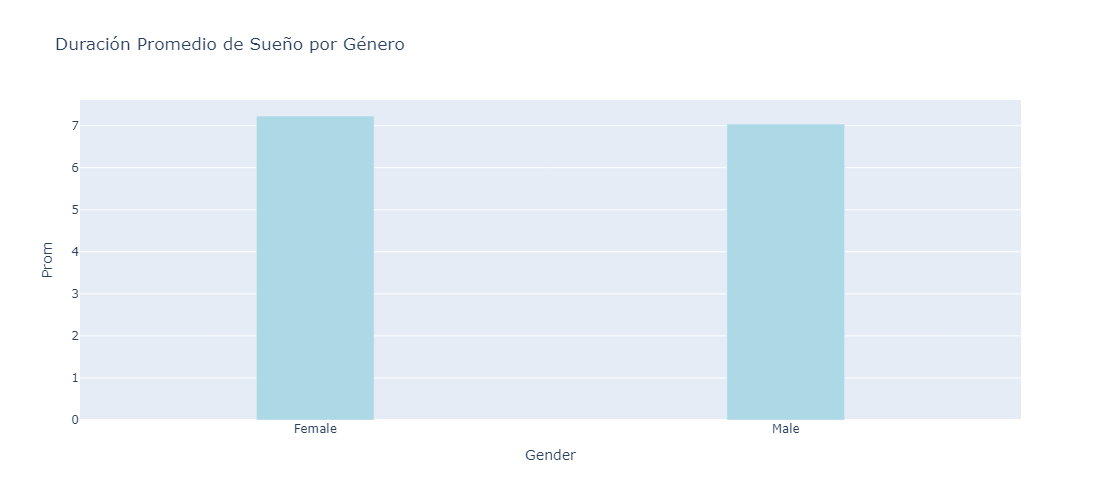

In [125]:
#G2:Duración Promedio de Sueño por Género
df = data.groupby(['Gender'])['Sleep Duration'].mean().reset_index(name='Prom')

fig = px.bar(df, x='Gender', y='Prom', title= "Duración Promedio de Sueño por Género")
fig.update_traces(width=0.25,marker_color='lightblue')
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
)

fig.show()


In [88]:
#Promedio de calidad de sueño por genero
data.groupby('Gender')['Quality of Sleep'].mean().reset_index(name='Prom')

,Gender,Prom
0,Female,7.664865
1,Male,6.968254


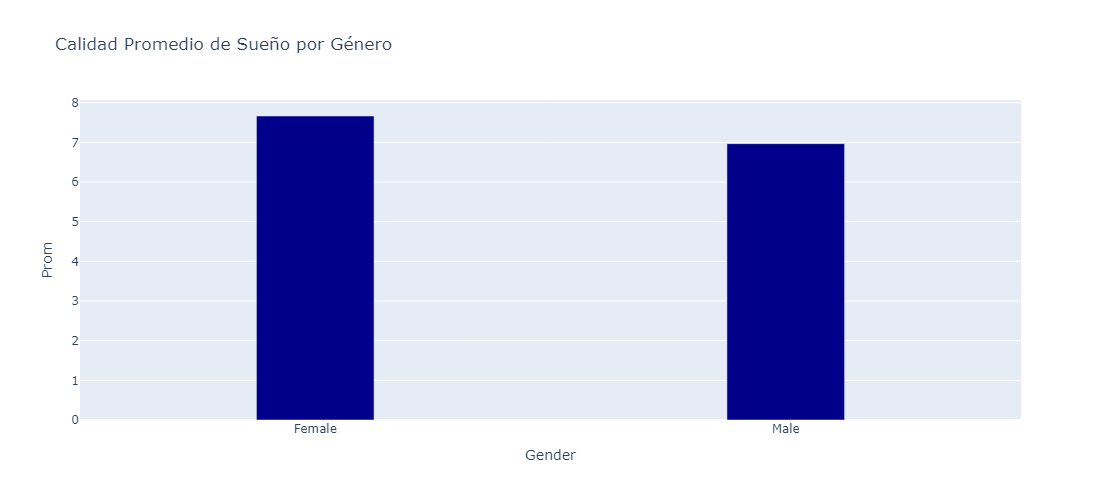

In [126]:
#G3:Calidad Promedio de Sueño por Género
df = data.groupby(['Gender'])['Quality of Sleep'].mean().reset_index(name='Prom')

fig = px.bar(df, x='Gender', y='Prom', title= "Calidad Promedio de Sueño por Género")
fig.update_traces(width=0.25,marker_color='darkblue')
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
)

fig.show()

In [89]:
#Cantidad de desordenes de sueño por genero
data['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [28]:
#Cantidad de desordenes de sueño por genero
data.groupby(['Gender'])['Sleep Disorder'].value_counts()

Gender  Sleep Disorder
Female  Sleep Apnea       67
        Insomnia          36
Male    Insomnia          41
        Sleep Apnea       11
Name: count, dtype: int64

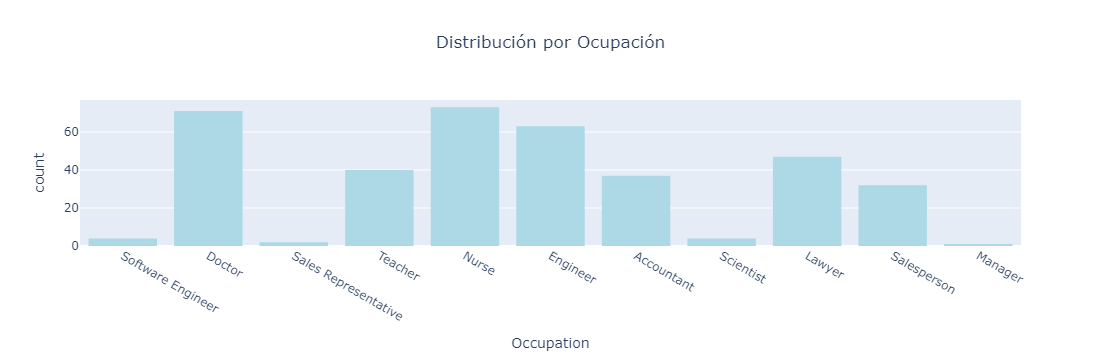

In [138]:
#G4:Distribución por Ocupación

fig = px.histogram(data, x="Occupation", title="Distribución por Ocupación")
fig.update_traces(marker_color='lightblue')
fig.update_layout(title={ 'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})

fig.show()

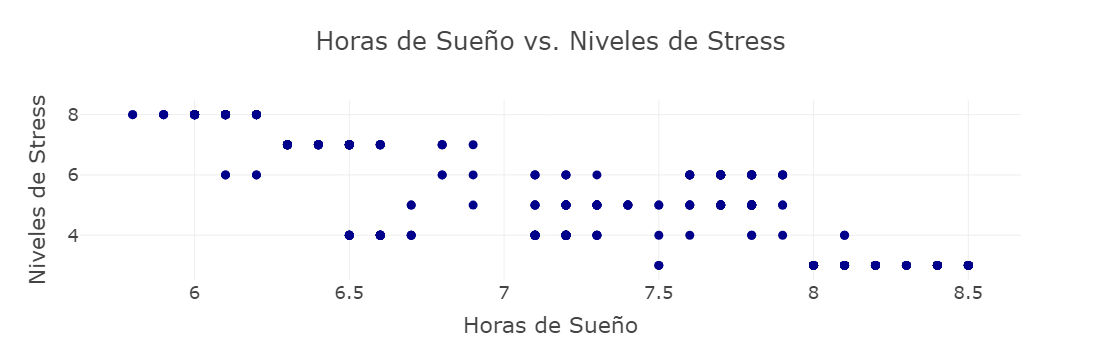

In [141]:
#G5:Grafico para verificar el nivel de estrés por las horas de sueño
fig = px.scatter(data, x='Sleep Duration', y='Stress Level', 
                 title='Horas de Sueño vs. Niveles de Stress',
                 labels={'Sleep Duration': 'Horas de Sueño', 'Stress Level': 'Niveles de Stress'},
                 template='presentation')
fig.update_traces(marker_color='darkblue')
fig.show()

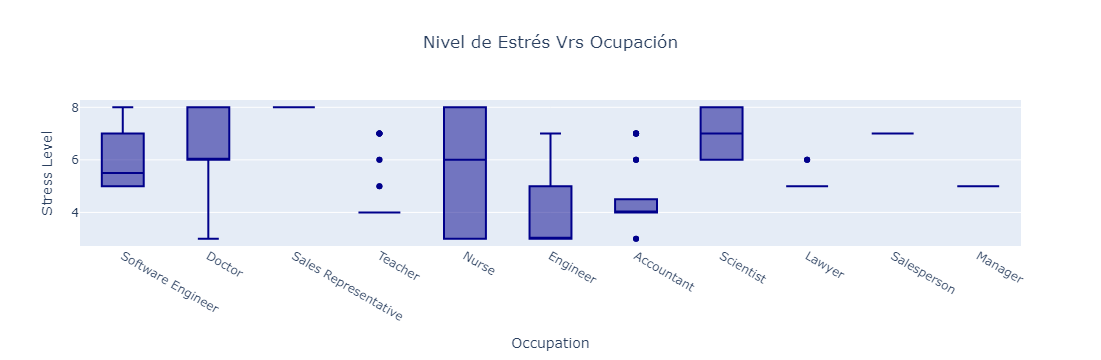

In [162]:
#G6:BoxPlot para verificación del nivel de estrés por la ocupación
fig = px.box(data, x= "Occupation", y="Stress Level", title="Nivel de Estrés Vrs Ocupación")
fig.update_traces(marker_color='darkblue')
fig.update_layout(title={ 'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

In [18]:
#Ordenando Ds
data.sort_values(by = "Person ID", ascending = True).head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


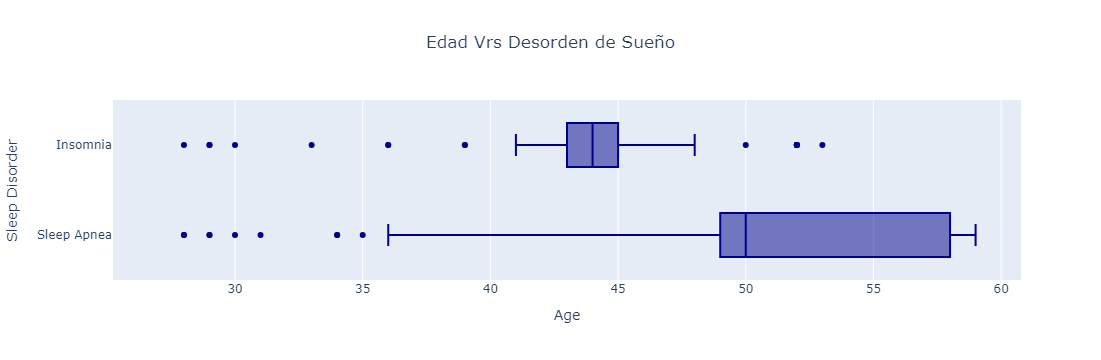

In [161]:
#G7:Edad Vrs Desorden de Sueño
fig = px.box(data, x= "Age", y="Sleep Disorder", title="Edad Vrs Desorden de Sueño")
fig.update_traces(marker_color='darkblue')
fig.update_layout(title={ 'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

In [ ]:
En conclusión se tiene lo siguiente:
La calidad y cantidad de sueño por genero demuestra que las mujeres presentan un mejor promedio por una pequeña diferencia ante los hombres.
Entre los factores que influyen en el alto nivel de estrés se demuestra que a medida las horas de sueño se elevan, el nivel tiende a la baja 
tal como lo muestra la grafica G5. Así como se demuestra que la profesión que presenta altos niveles de estrés es la Enfermería, seguida por Doctores
y Científicos.
La edad es un factor que influye para la aparición de desordenes de sueño, tal como muestra el grafico G7